In [138]:
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy

In [124]:
print('loading index...')
df = pd.read_csv('/home/hbkoziel/awi-models/data/mesh/meshArc4.5/bioregion_index_latlon.csv', delimiter=',',header=0)
print('DONE')

loading index...
DONE


In [125]:
df.sort_values(by ='Unique_ID',inplace=True)

index = df["Unique_ID"]
index_unique = df.Unique_ID.unique().tolist()
index_unique.pop(-1)
#index_unique = np.array(index_unique)
#index_unique = index_unique.astype(int)
index_unique

[24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0]

In [126]:
names = df.Name.unique().tolist()
names.pop(-1)
names

['Arctic Ocean -- Atlantic Basin',
 'Arctic Ocean -- Pacific Basin',
 'Baffin Bay -- Canadian Shelf',
 'Beaufort Sea - continental coast and shelf',
 'Beaufort-Amundsen-Viscount Melville-Queen Maud',
 'Chukchi Sea',
 'Baffin Bay',
 'East Greenland Shelf',
 'East Siberian Sea',
 'Eastern Bering Sea',
 'Fram Strait',
 'High Arctic Archipelago',
 'Hudson Complex',
 'Iceland Shelf',
 'Kara Sea',
 'Labrador Sea Basin',
 'Lancaster Sound',
 'Laptev Sea',
 'North Greenland',
 'North and East Barents Sea',
 'Northern Grand Banks - Southern Labrador',
 'Northern Labrador',
 'Northern Norway and Finnmark',
 'Norwegian Sea',
 'West Greenland Shelf',
 'Western Bering Sea',
 'White Sea']

In [127]:
names[3]='Beaufort Sea - shelf'
names[4]='Beaufort-Amundsen-Viscount'
names.append('All Arctic Ocean (>66°N)')
names

['Arctic Ocean -- Atlantic Basin',
 'Arctic Ocean -- Pacific Basin',
 'Baffin Bay -- Canadian Shelf',
 'Beaufort Sea - shelf',
 'Beaufort-Amundsen-Viscount',
 'Chukchi Sea',
 'Baffin Bay',
 'East Greenland Shelf',
 'East Siberian Sea',
 'Eastern Bering Sea',
 'Fram Strait',
 'High Arctic Archipelago',
 'Hudson Complex',
 'Iceland Shelf',
 'Kara Sea',
 'Labrador Sea Basin',
 'Lancaster Sound',
 'Laptev Sea',
 'North Greenland',
 'North and East Barents Sea',
 'Northern Grand Banks - Southern Labrador',
 'Northern Labrador',
 'Northern Norway and Finnmark',
 'Norwegian Sea',
 'West Greenland Shelf',
 'Western Bering Sea',
 'White Sea',
 'All Arctic Ocean (>66°N)']

In [128]:
lonfile    = '/home/hbkoziel/awi-models/data/mesh/meshArc4.5/lon.csv'
latfile    = '/home/hbkoziel/awi-models/data/mesh/meshArc4.5/lat.csv'


df_lon = pd.read_csv(lonfile, header=None, sep = ',', decimal=".")
df_lat = pd.read_csv(latfile, header=None, sep = ',', decimal=".")

df_lon.columns = ['lon']
df_lat.columns = ['lat']

In [129]:
def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

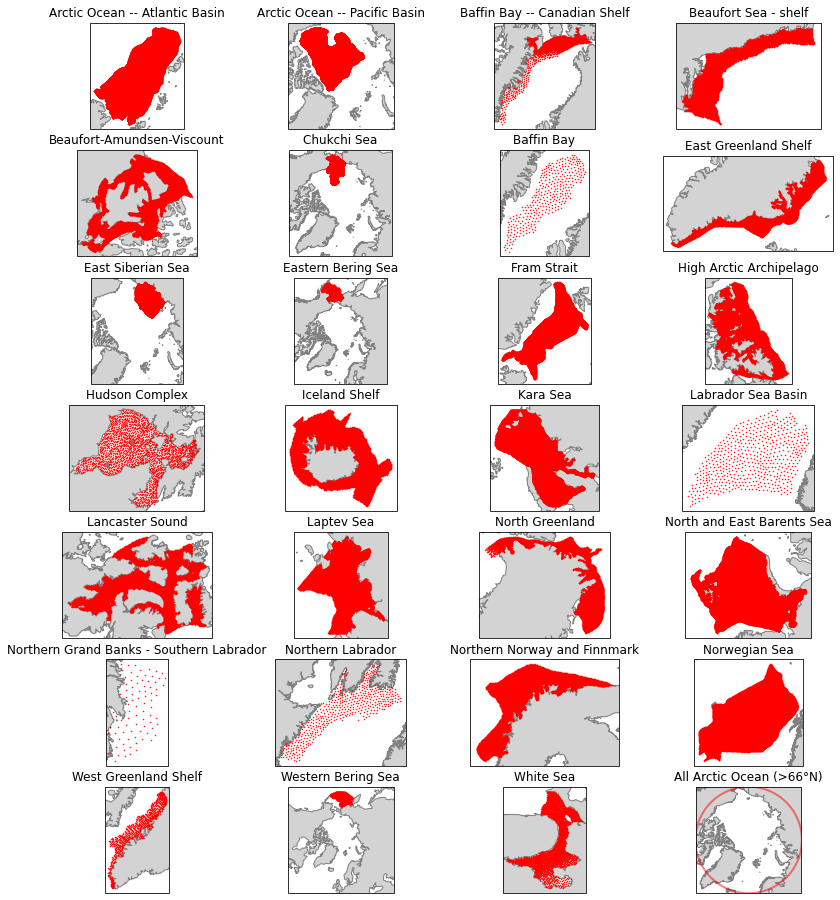

In [140]:
figsize = (14, 16)
rows,cols = 7,4
regions = range(0,28)

crs_latlon = ccrs.PlateCarree()
crs = ccrs.NorthPolarStereo()

axs = plt.figure(figsize=figsize, constrained_layout=False).subplots(rows,cols,sharey=False,sharex=False, subplot_kw=dict(projection=crs))
axs = trim_axs(axs, len(regions))

index = df["Unique_ID"]

for ax, b in zip(axs, regions):
    # Reproject the data / get projections
    if b<27:
        ax.plot(df_lon.lon[df.full_index[index==b+24]],df_lat.lat[df.full_index[index==b+24]],'r.',markersize=1, transform=crs_latlon)
    else:
        ax.set_extent([-180, 180, 66, 90], ccrs.PlateCarree())
        gl = ax.gridlines(linewidth=2, color='red', alpha=0.5)
        gl.ylocator = mticker.FixedLocator([66])
        gl.xlines = False
    ax.add_feature(cartopy.feature.LAND, zorder=1,facecolor='lightgray', edgecolor='gray')
    ax.set_title(names[b])

plt.savefig('/home/hbkoziel/earth-analytics-python-env/figures/bioregion_maps_forsertemp.png', dpi = 300, bbox_inches = 'tight')
plt.savefig('/home/hbkoziel/pyfesom/figures/Arc12/sertemp/bioregion_maps_forsertemp.png', dpi = 300, bbox_inches = 'tight')   
